<br/>
Exercise12: k-means  
DataSciene (BHTB MIM 12 S18)  

Martina Ahlswede  
<br/>  


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
plt.rcParams['figure.figsize'] = (16, 9)

# from Edlich example
# Creating a sample dataset with 4 clusters
# X, y = make_blobs(n_samples=800, n_features=3, centers=4)

.

In [2]:
df = pd.read_csv('edlich-kmeans-A0.csv')

In [3]:
df.sample(10)

,V1,V2,V3
92,-3.885563,1.932293,-9.393471
60,6.211302,3.838489,4.365916
89,5.489432,2.921354,2.833159
14,-5.179535,4.846320,4.247216
17,4.001281,9.658771,-8.122426
90,-0.077133,1.519599,-8.371431
91,-2.717136,2.492140,-8.596672
63,4.932705,4.247794,4.262368
23,-9.338556,-4.076971,7.490780
33,4.478608,9.960070,-10.756151


In [4]:
X = df.values[0:100]

In [5]:
y = df.values[:,1]

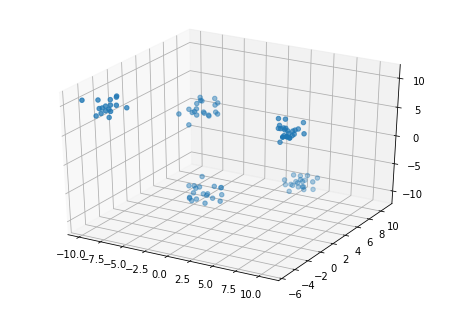

In [6]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])                       

due to graphic above we should use **k = 5**

In [7]:
# Initializing KMeans
kmeans = KMeans(n_clusters=5)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

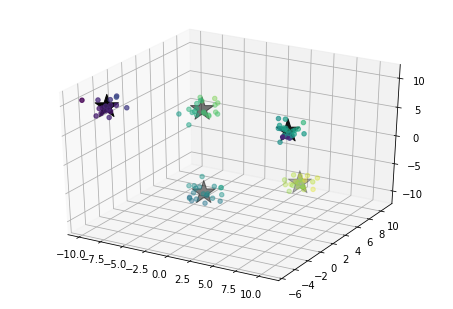

In [8]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=600)

<br/><br/><br/>

In [9]:
# our centers
C

array([[ 6.47155208,  2.70446035,  5.19967608],
       [-2.40331671,  2.14752865, -8.02378894],
       [-8.53242046, -3.55401526,  8.96857685],
       [-5.10691526,  5.60179825,  3.71956936],
       [ 3.66536804,  8.91074968, -9.06579829]])

<br/>
//

The clustering vector

suggestions from https://mubaris.com/2017/10/01/kmeans-clustering-in-python/  
.

In [10]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [11]:
clusters = np.zeros(len(X))

In [12]:
# Assigning each value to its closest cluster
for i in range(len(X)):
    distances = dist(X[i], C)
    cluster = np.argmin(distances)
    clusters[i] = cluster

In [13]:
# Show the clustering vector
clusters

array([3., 2., 2., 0., 2., 4., 0., 2., 1., 0., 2., 1., 0., 4., 3., 2., 1.,
       4., 3., 3., 2., 1., 3., 2., 2., 0., 1., 1., 1., 4., 1., 1., 4., 4.,
       2., 3., 4., 3., 1., 2., 4., 4., 4., 3., 4., 2., 0., 0., 4., 0., 0.,
       4., 1., 1., 0., 0., 3., 0., 2., 4., 0., 3., 0., 0., 4., 0., 3., 3.,
       3., 4., 4., 0., 1., 0., 0., 1., 2., 4., 0., 1., 1., 4., 2., 3., 3.,
       2., 3., 3., 3., 0., 1., 1., 1., 2., 0., 0., 1., 4., 3., 3.])

In [19]:
print ("1. Cluster (#0)")
C[0], X[3], X[6], X[9], "..."

1. Cluster (#0)


(array([6.47155208, 2.70446035, 5.19967608]),
 array([5.7082258 , 2.65857479, 5.40448245]),
 array([6.37219562, 4.45994039, 4.36935755]),
 array([5.62156138, 3.43105644, 4.66657363]),
 '...')

In [20]:
print ("2. Cluster (#1)")
C[1], X[8], X[11], X[16], "..."

2. Cluster (#1)


(array([-2.40331671,  2.14752865, -8.02378894]),
 array([-3.40526552,  2.28142739, -7.63117179]),
 array([-4.61692581,  2.83368789, -7.96289974]),
 array([-3.07076859,  1.47953458, -7.79850529]),
 '...')

In [21]:
print ("3. Cluster (#2)")
C[2], X[1], X[2], X[4], "..."

3. Cluster (#2)


(array([-8.53242046, -3.55401526,  8.96857685]),
 array([-9.58706542, -3.43446551,  9.70183939]),
 array([-8.38501223, -3.90279369,  8.51462008]),
 array([-7.43166517, -4.39025105,  9.00321635]),
 '...')

In [22]:
print ("4. Cluster (#3)")
C[3], X[0], X[14], X[18], "..."

4. Cluster (#3)


(array([-5.10691526,  5.60179825,  3.71956936]),
 array([-5.34023562,  4.7472463 ,  3.82332607]),
 array([-5.1795348 ,  4.8463202 ,  4.24721594]),
 array([-4.42847662,  6.65686938,  4.00895955]),
 '...')

In [23]:
print ("5. Cluster (#4)")
C[4], X[5], X[13], X[17], "..."

5. Cluster (#4)


(array([ 3.66536804,  8.91074968, -9.06579829]),
 array([ 5.028509  ,  9.04769521, -8.54843651]),
 array([ 3.70343606,  8.61137549, -9.59257599]),
 array([ 4.00128095,  9.65877107, -8.12242599]),
 '...')

//